# Admission classification problem 

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")



In [90]:
df = pd.read_csv(r'E:/INTERN/INTERN SAVY/GRADUATE ADMISSION\Admission_Predict_Ver1.1.csv')

In [91]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [93]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [94]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [95]:
df= df.drop(columns="Serial No.")

In [96]:
df.shape

(500, 8)

In [97]:
df.duplicated().sum()

0

In [98]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

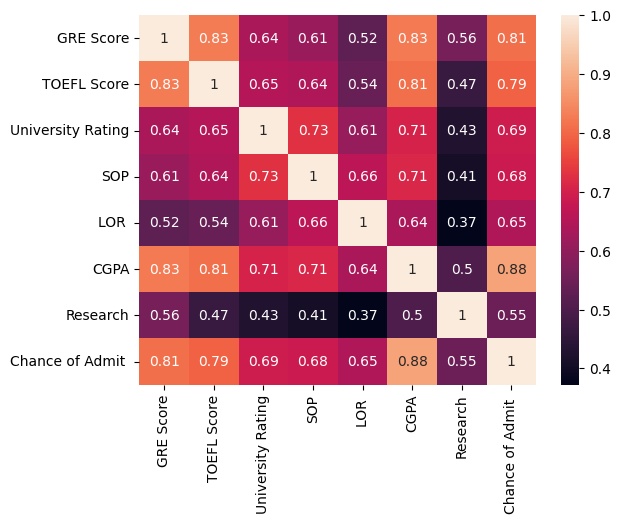

In [99]:
sns.heatmap(df.corr(), annot=True)

# Univariate analysis 

<Axes: xlabel='GRE Score', ylabel='Count'>

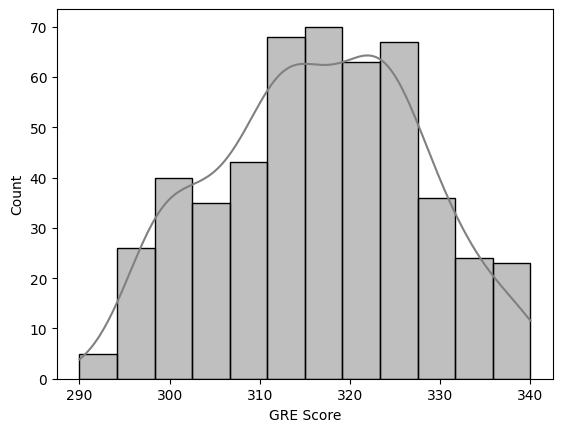

In [100]:
sns.histplot(df['GRE Score'], kde=True, color="grey")

<Axes: xlabel='CGPA', ylabel='Count'>

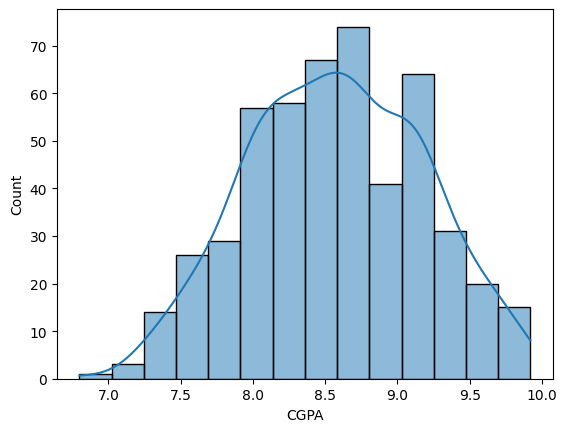

In [101]:
sns.histplot(df['CGPA'], kde=True)

<Axes: xlabel='University Rating', ylabel='Count'>

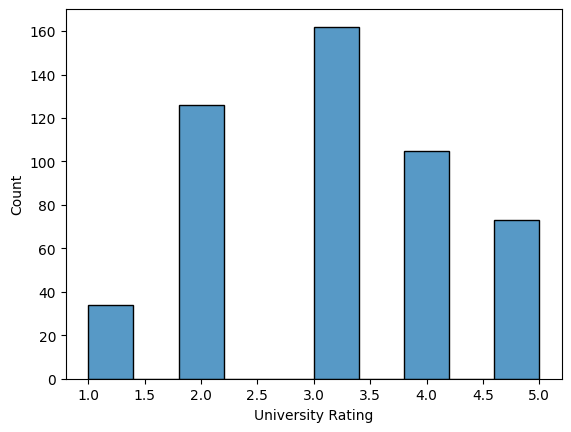

In [102]:
sns.histplot(df['University Rating'])

<Axes: xlabel='SOP', ylabel='Count'>

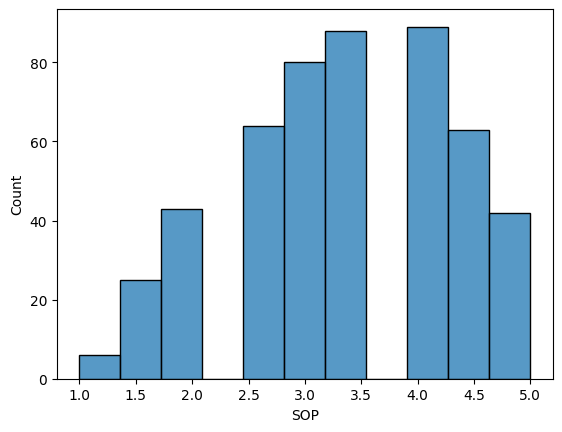

In [103]:
sns.histplot(df['SOP'])

<Axes: xlabel='Research'>

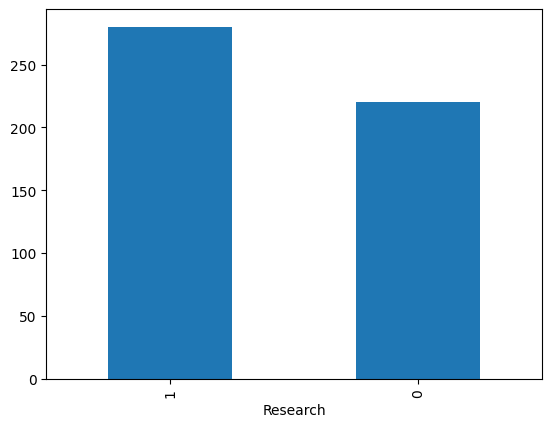

In [104]:
df['Research'].value_counts().plot(kind="bar")

<Axes: xlabel='LOR ', ylabel='Count'>

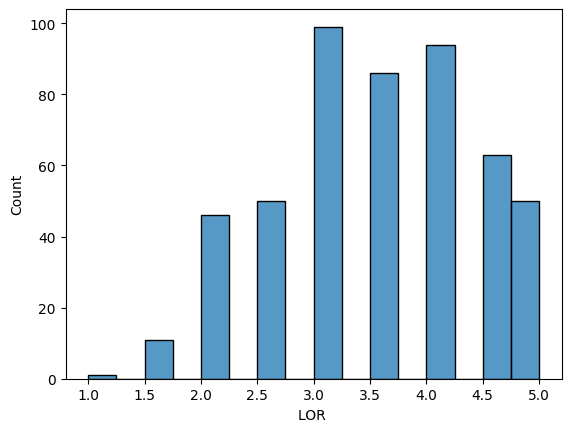

In [105]:
sns.histplot(df['LOR '])

# Bivariate analysis 

<Axes: xlabel='Research', ylabel='Chance of Admit '>

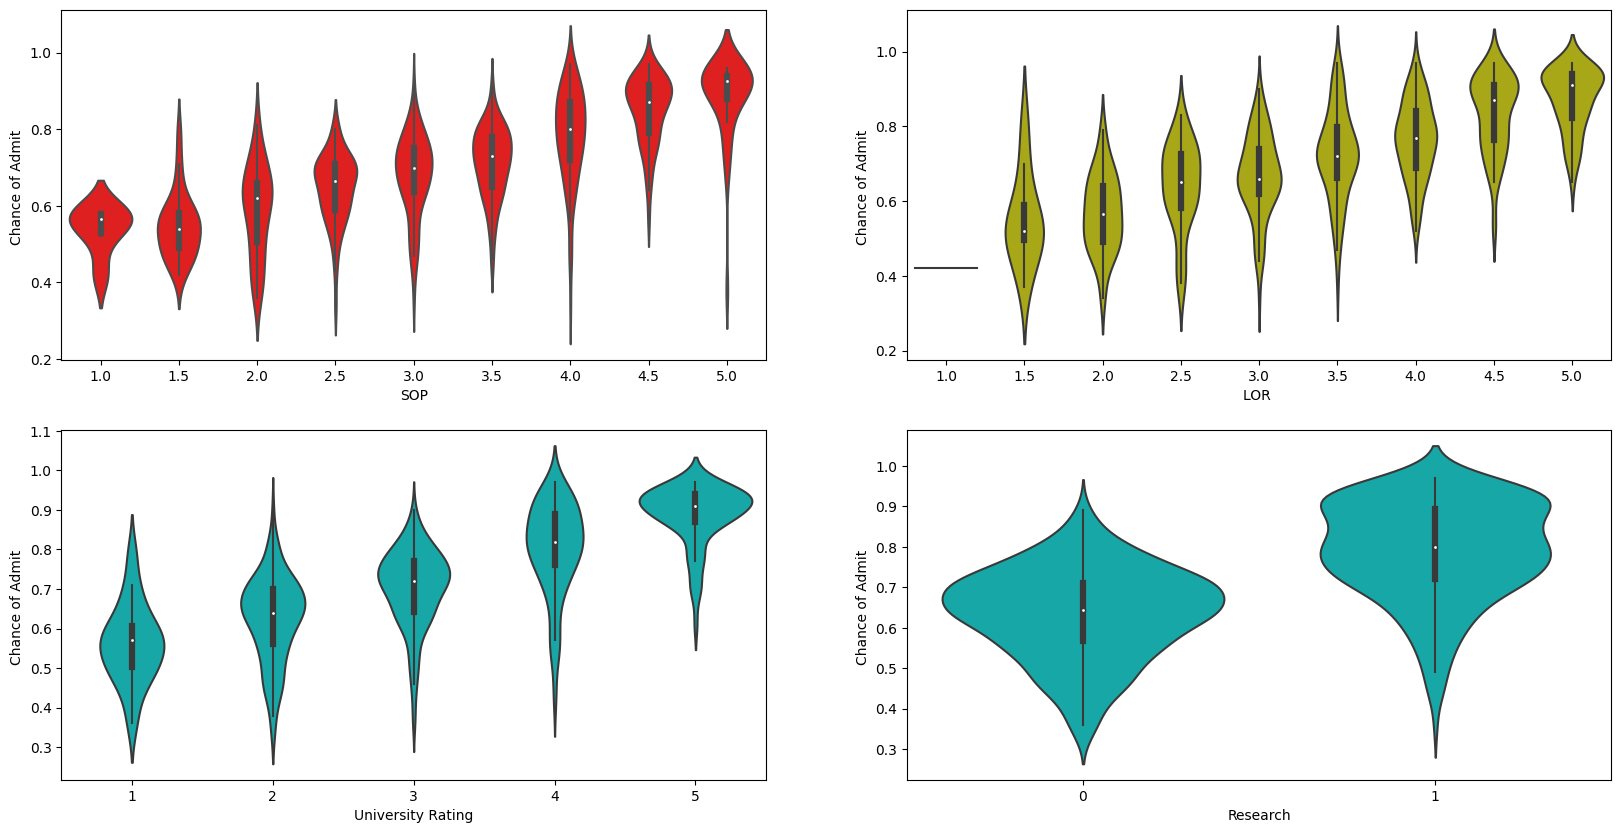

In [106]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.violinplot(df, x="SOP", y="Chance of Admit ", color="r")
plt.subplot(2,2,2)
sns.violinplot(df, x="LOR ", y="Chance of Admit ", color="y")
plt.subplot(2,2,3)
sns.violinplot(df, x="University Rating", y="Chance of Admit ", color="c")
plt.subplot(2,2,4)
sns.violinplot(df, x="Research", y="Chance of Admit ", color="c")

# Scatter Plot of CGPA, GRE Score and TOEFL Score with Chance of Admit

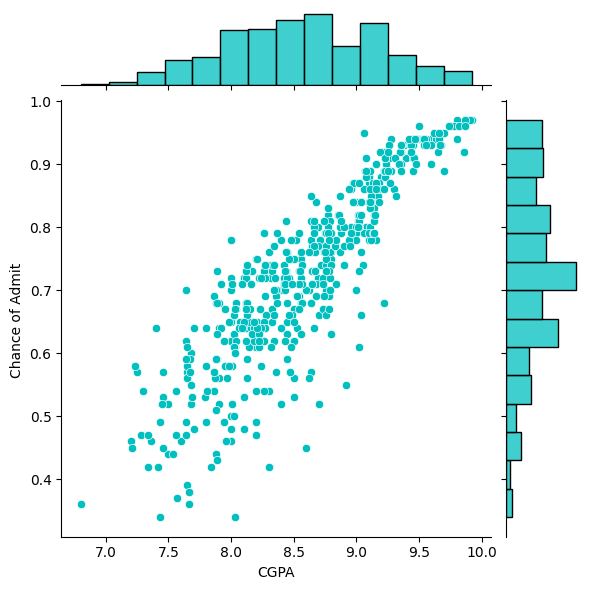

In [107]:
sns.jointplot(df,x='CGPA',y='Chance of Admit ', color="c")

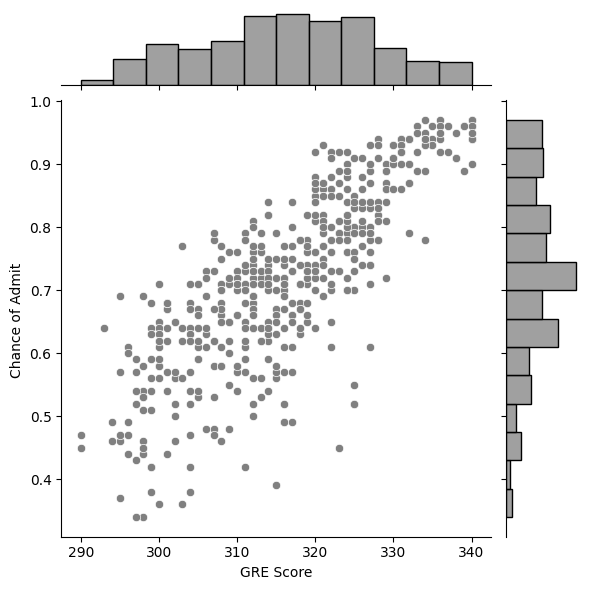

In [108]:
sns.jointplot(df,x='GRE Score',y='Chance of Admit ', color="grey")

In [109]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [110]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# outliers check

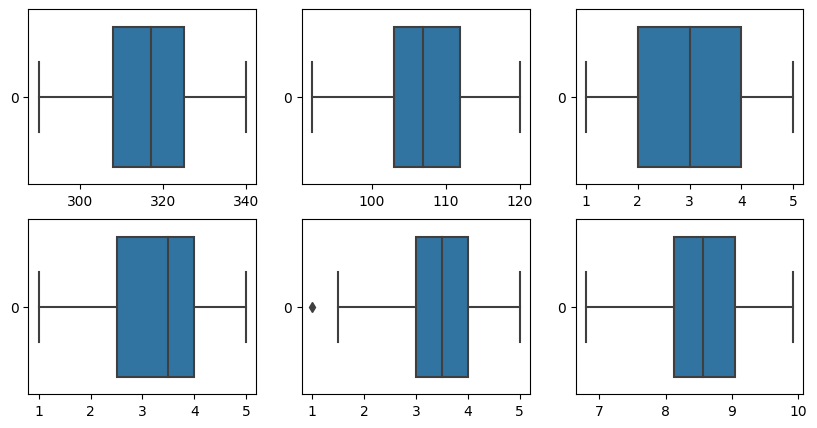

In [111]:
g = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
plt.figure(figsize=(10,5))
for i,j in enumerate(g):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[j], orient="h")

In [112]:
x = df.values
wcs = []
for i in range(1,30):
    kmm = KMeans(n_clusters=i)
    kmm.fit(x)
    wcs.append(kmm.inertia_)

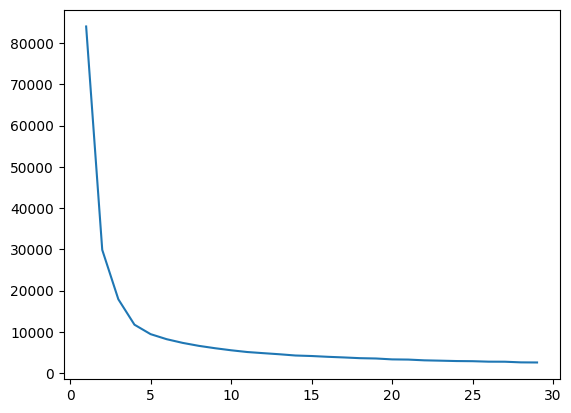

In [113]:
plt.plot(range(1,30), wcs)

In [114]:
kmc = KMeans(n_clusters=2)
y_means = kmc.fit_predict(x)

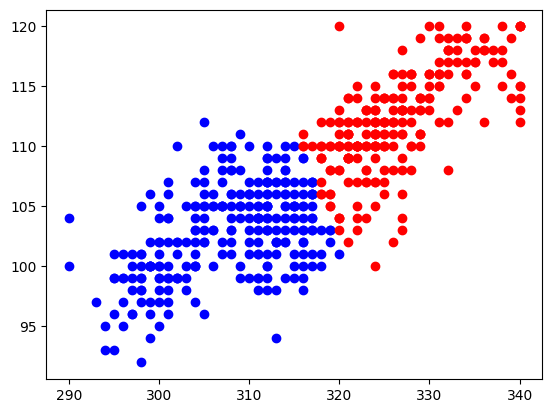

In [115]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color='blue')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],color='red')



In [116]:
df['target'] = y_means

In [127]:
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,target
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0
5,330,115,5,4.5,3.0,9.34,1,0.90,1
6,321,109,3,3.0,4.0,8.20,1,0.75,1
7,308,101,2,3.0,4.0,7.90,0,0.68,0
8,302,102,1,2.0,1.5,8.00,0,0.50,0
9,323,108,3,3.5,3.0,8.60,0,0.45,1


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [119]:
x= df.drop(columns="target")
y = df['target']


In [120]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [121]:
lor = LogisticRegression()
gra = GradientBoostingClassifier(n_estimators=50, random_state=2)
knn = KNeighborsClassifier(n_neighbors=5)
svp = SVC(kernel='poly')
svpr = SVC(kernel='rbf')
dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier()

In [122]:
for i in range(6, 40):
    x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=i)
    classifiers = [lor, gra, knn, svp, svpr, dtc, ada]
    c = 0

    for classifier in classifiers:
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accura = accuracy_score(y_test, y_pred)
        c = c+accura
        print(classifier, accura , i , end="\n\n")
    print("total c", c ,"\n")
    print("----------------------")

LogisticRegression() 0.99 6

GradientBoostingClassifier(n_estimators=50, random_state=2) 1.0 6

KNeighborsClassifier() 0.94 6

SVC(kernel='poly') 0.98 6

SVC() 0.97 6

DecisionTreeClassifier() 0.99 6



AdaBoostClassifier() 0.98 6

total c 6.85 

----------------------
LogisticRegression() 0.96 7

GradientBoostingClassifier(n_estimators=50, random_state=2) 1.0 7

KNeighborsClassifier() 0.9 7

SVC(kernel='poly') 0.91 7

SVC() 0.95 7

DecisionTreeClassifier() 1.0 7

AdaBoostClassifier() 1.0 7

total c 6.72 

----------------------
LogisticRegression() 0.97 8

GradientBoostingClassifier(n_estimators=50, random_state=2) 0.98 8

KNeighborsClassifier() 0.93 8

SVC(kernel='poly') 0.96 8

SVC() 0.97 8

DecisionTreeClassifier() 0.98 8

AdaBoostClassifier() 0.97 8

total c 6.759999999999999 

----------------------
LogisticRegression() 0.96 9

GradientBoostingClassifier(n_estimators=50, random_state=2) 0.99 9

KNeighborsClassifier() 0.91 9

SVC(kernel='poly') 0.96 9

SVC() 0.94 9

DecisionTreeClassifier() 0.99 9

AdaBoostClassifier() 0.99 9

total c 6.74 

----------------------
LogisticRegression() 0.98 10

GradientBoostingClassifier(n_estimators=50, random_state=2) 1.0 10

KNeighborsClassifie

# in random state -19 accuraccy is high 

In [126]:

  
classifiers = [lor, gra, knn, svp, svpr, dtc, ada]
  

for classifier in classifiers:
        x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=19)
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accura = accuracy_score(y_test, y_pred)
        
        print(classifier, accura  , end="\n")
    
print("----------------------")

LogisticRegression() 1.0
GradientBoostingClassifier(n_estimators=50, random_state=2) 1.0
KNeighborsClassifier() 0.99
SVC(kernel='poly') 0.99
SVC() 1.0
DecisionTreeClassifier() 1.0
AdaBoostClassifier() 1.0
----------------------


In [124]:
prdicted = pd.DataFrame({"original":y_test, "LogisticRegression":lor.predict(x_test),
             "GradientBoostingClassifier":gra.predict(x_test),
             "KNeighborsClassifier":knn.predict(x_test),
             "svm(poly)":svp.predict(x_test),
             "svm(rbf)":svpr.predict(x_test),
             "DecisionTreeClassifier":dtc.predict(x_test),
             "AdaBoostClassifier":ada.predict(x_test)
             })

In [125]:
prdicted.head(50)

,original,LogisticRegression,GradientBoostingClassifier,KNeighborsClassifier,svm(poly),svm(rbf),DecisionTreeClassifier,AdaBoostClassifier
12,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1
317,0,0,0,0,0,0,0,0
441,1,1,1,1,1,1,1,1
361,1,1,1,1,1,1,1,1
103,0,0,0,0,0,0,0,0
423,1,1,1,1,1,1,1,1
269,0,0,0,0,0,0,0,0
98,1,1,1,1,1,1,1,1
150,1,1,1,1,1,1,1,1
